<a href="https://colab.research.google.com/github/MYElmasry/Regression/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression For One Variable**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '/content/drive/MyDrive/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [6]:
#show data details
print('data = \n' ,data.head(10) )
print('**************************************')
print('data.describe = \n',data.describe())

data = 
    Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233
5     1      8.3829  11.8860
6     1      7.4764   4.3483
7     1      8.5781  12.0000
8     1      6.4862   6.5987
9     1      5.0546   3.8166
**************************************
data.describe = 
        Ones  Population     Profit
count  97.0   97.000000  97.000000
mean    1.0    8.159800   5.839135
std     0.0    3.869884   5.510262
min     1.0    5.026900  -2.680700
25%     1.0    5.707700   1.986900
50%     1.0    6.589400   4.562300
75%     1.0    8.578100   7.046700
max     1.0   22.203000  24.147000


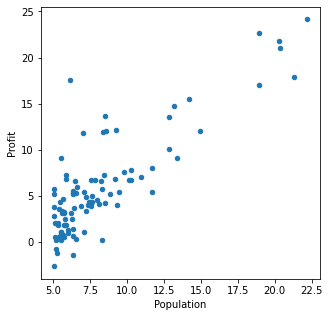

In [4]:
#draw data
data.plot(kind='scatter', x='Population', y='Profit', figsize=(5,5))

In [5]:
data.insert(0, 'Ones', 1)
print('new data = \n' ,data.head(10) )

new data = 
    Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233
5     1      8.3829  11.8860
6     1      7.4764   4.3483
7     1      8.5781  12.0000
8     1      6.4862   6.5987
9     1      5.0546   3.8166


In [7]:
# separate X (training data) from y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
print('**************************************')
print('X data = \n' ,X.head(10) )
print('y data = \n' ,y.head(10) )

**************************************
X data = 
    Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598
5     1      8.3829
6     1      7.4764
7     1      8.5781
8     1      6.4862
9     1      5.0546
y data = 
     Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233
5  11.8860
6   4.3483
7  12.0000
8   6.5987
9   3.8166


In [18]:
# convert from data frames to numpy matrices
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.array([0,0]))
print('X \n',X)
print('X.shape = ' , X.shape)
print('theta \n',theta)
print('theta.shape = ' , theta.shape)
print('y \n',y)
print('y.shape = ' , y.shape)

X 
 [[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.   

In [19]:
# cost function
def computeCost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2)
    # print('z \n',z)
    # print('m ' ,len(X))
    return np.sum(z) / (2 * len(X))
print('computeCost(X, y, theta) = ' , computeCost(X, y, theta))

computeCost(X, y, theta) =  32.072733877455676


In [23]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost
alpha = 0.01
iters = 10000
# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)
print('g = ' , g)
print('cost = ' , cost[0:50] )
print('computeCost = ' , computeCost(X, y, g))


g =  [[-3.89578082  1.19303364]]
cost =  [6.73719046 5.93159357 5.90115471 5.89522859 5.89009494 5.88500416
 5.87993248 5.87487909 5.86984391 5.86482687 5.85982789 5.85484692
 5.84988389 5.84493874 5.8400114  5.83510181 5.8302099  5.82533562
 5.82047889 5.81563965 5.81081784 5.8060134  5.80122627 5.79645638
 5.79170367 5.78696808 5.78224955 5.77754801 5.77286341 5.76819568
 5.76354477 5.75891061 5.75429313 5.7496923  5.74510803 5.74054027
 5.73598897 5.73145406 5.72693549 5.72243319 5.71794711 5.71347718
 5.70902336 5.70458558 5.70016379 5.69575792 5.69136792 5.68699373
 5.6826353  5.67829257]
computeCost =  4.476971375975179


x 
 [ 5.0269      5.20039596  5.37389192  5.54738788  5.72088384  5.8943798
  6.06787576  6.24137172  6.41486768  6.58836364  6.7618596   6.93535556
  7.10885152  7.28234747  7.45584343  7.62933939  7.80283535  7.97633131
  8.14982727  8.32332323  8.49681919  8.67031515  8.84381111  9.01730707
  9.19080303  9.36429899  9.53779495  9.71129091  9.88478687 10.05828283
 10.23177879 10.40527475 10.57877071 10.75226667 10.92576263 11.09925859
 11.27275455 11.44625051 11.61974646 11.79324242 11.96673838 12.14023434
 12.3137303  12.48722626 12.66072222 12.83421818 13.00771414 13.1812101
 13.35470606 13.52820202 13.70169798 13.87519394 14.0486899  14.22218586
 14.39568182 14.56917778 14.74267374 14.9161697  15.08966566 15.26316162
 15.43665758 15.61015354 15.78364949 15.95714545 16.13064141 16.30413737
 16.47763333 16.65112929 16.82462525 16.99812121 17.17161717 17.34511313
 17.51860909 17.69210505 17.86560101 18.03909697 18.21259293 18.38608889
 18.55958485 18.73308081 18.90657677 19.08007273 

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

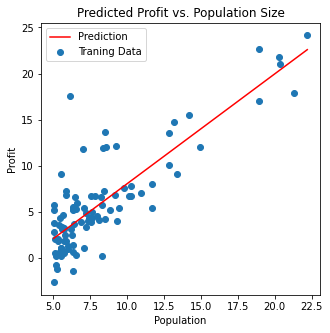

In [24]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
print('x \n',x)
print('g \n',g)
f = g[0, 0] + (g[0, 1] * x)
print('f \n',f)
# draw the line
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

# **Regression For More Than One Variable**

In [25]:
path = '/content/drive/MyDrive/ex1data2.txt'
data = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
print('Data= \n',data.head(10))
print('Data= \n',data.describe())

Data= 
    Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
5  1985         4  299900
6  1534         3  314900
7  1427         3  198999
8  1380         3  212000
9  1494         3  242500
Data= 
               Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


In [27]:
# Data Rescalling
data = (data-data.mean())/data.std()
print('Data= \n',data.head(10))
print('Data= \n',data.describe())

Data= 
        Size  Bedrooms     Price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389
5 -0.019732  1.090417 -0.323998
6 -0.587240 -0.223675 -0.204036
7 -0.721881 -0.223675 -1.130948
8 -0.781023 -0.223675 -1.026973
9 -0.637573 -0.223675 -0.783051
Data= 
             Size      Bedrooms         Price
count  47.000000  4.700000e+01  4.700000e+01
mean    0.000000  1.830687e-17 -3.543265e-17
std     1.000000  1.000000e+00  1.000000e+00
min    -1.445423 -2.851859e+00 -1.363666e+00
25%    -0.715590 -2.236752e-01 -7.238702e-01
50%    -0.141790 -2.236752e-01 -3.239979e-01
75%     0.337635  1.090417e+00  3.521863e-01
max     3.117292  2.404508e+00  2.874981e+00


In [28]:
#Add ones column
data.insert(0, 'ones', 1)

In [29]:
# separate X (training data) from y (target variable)
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:,cols-1:cols]
print('X data = \n' ,X.head(10) )
print('y data = \n' ,y.head(10) )


X data = 
    ones      Size  Bedrooms
0     1  0.130010 -0.223675
1     1 -0.504190 -0.223675
2     1  0.502476 -0.223675
3     1 -0.735723 -1.537767
4     1  1.257476  1.090417
5     1 -0.019732  1.090417
6     1 -0.587240 -0.223675
7     1 -0.721881 -0.223675
8     1 -0.781023 -0.223675
9     1 -0.637573 -0.223675
y data = 
       Price
0  0.475747
1 -0.084074
2  0.228626
3 -0.867025
4  1.595389
5 -0.323998
6 -0.204036
7 -1.130948
8 -1.026973
9 -0.783051


In [31]:
# convert to matrices and initialize theta
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.array([0,0,0]))

In [32]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [33]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X*theta.T)-y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [38]:
alpha = 0.01
iters = 100
g, cost = gradientDescent(X, y, theta, alpha, iters)
print('New Theta= ',g)
print('The Cost= ',computeCost(X, y, g))

New Theta=  [[-1.70076719e-17  4.90915551e-01  1.62136650e-01]]
The Cost=  0.1828065051987115


Text(0.5, 1.0, 'Size vs. Price')

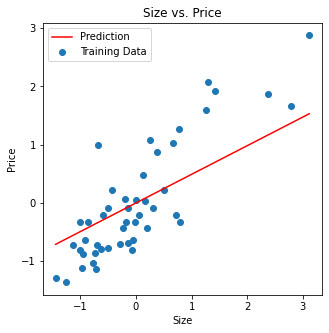

In [39]:
# get best fit line for Size vs. Price
x = np.linspace(data.Size.min(), data.Size.max(), 100)
# print('x \n',x)
f = g[0, 0] + (g[0, 1] * x)
# print('f \n',f)
# draw the line for Size vs. Price
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Size, data.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')

Text(0.5, 1.0, 'Size vs. Price')

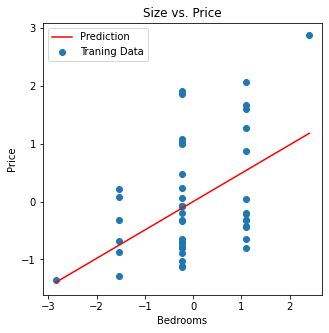

In [40]:
# get best fit line for Bedrooms vs. Price
x = np.linspace(data.Bedrooms.min(), data.Bedrooms.max(), 100)
# print('x \n',x)
f = g[0, 0] + (g[0, 1] * x)
# print('f \n',f)
# draw the line for Bedrooms vs. Price
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Bedrooms, data.Price, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')

Text(0.5, 1.0, 'Error vs. Training Epoch')

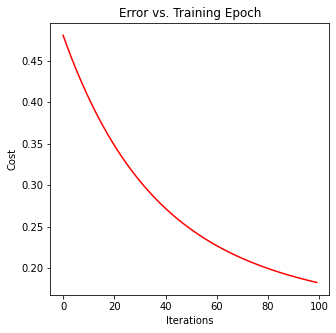

In [41]:

# draw error graph
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
